In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [89]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
testID = test['Id']
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [90]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [92]:
train.shape

(1460, 81)

In [93]:
test.shape

(1459, 80)

In [94]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [95]:
for col in train:
    if(train[col].dtype == 'object'):
        train[col].fillna(train[col].mode())
    else:
        train[col] = train[col].fillna(train[col].median())

In [96]:
def label_encoding(df_train,df_test):
    le_count=0
    for col in df_train:
        if(df_train[col].dtype=='object'):
            if(len(list(df_train[col].unique()))<=2):
                le=LabelEncoder()
                le.fit(list(df_train[col].unique())+list(df_test[col].unique()))
                
                df_train[col] = le.transform(df_train[col].astype(str))
                df_test[col] = le.transform(df_test[col].astype(str))
                le_count+=1
                print(col)
    print("Total label encoded columns : %d " %le_count)

In [97]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [101]:
train['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [98]:
label_encoding(train,test)

Street
Utilities
CentralAir
Total label encoded columns : 3 


In [15]:
train.shape

(1460, 81)

In [16]:
test.shape

(1459, 80)

In [ ]:
import copy

train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset = pd.get_dummies(dataset)
train = copy.copy(dataset[:train_objs_num])
test = copy.copy(dataset[train_objs_num:])
test = test.drop(['SalePrice'],axis=1)
train.shape
test.shape

In [17]:
import copy

In [18]:
train_objs_num = len(train)

In [20]:
dataset = pd.concat(objs=[train,test],axis=0)

In [25]:
dataset.shape

(2919, 81)

In [26]:
dataset = pd.get_dummies(dataset)#onehotencoding

In [40]:
train = copy.copy(dataset[:train_objs_num])

In [36]:
test = copy.copy(dataset[train_objs_num:])

In [42]:
test = test.drop(['SalePrice'],axis=1)

In [43]:
train.shape
test.shape

(1459, 286)

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

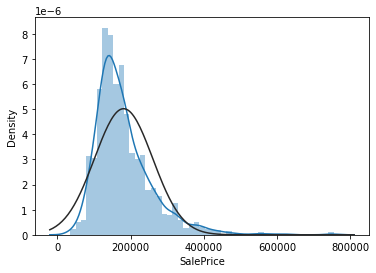

In [44]:
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)

In [45]:
corr = train.corr()

In [46]:
corr = corr.sort_values('SalePrice')

In [57]:
cols = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values

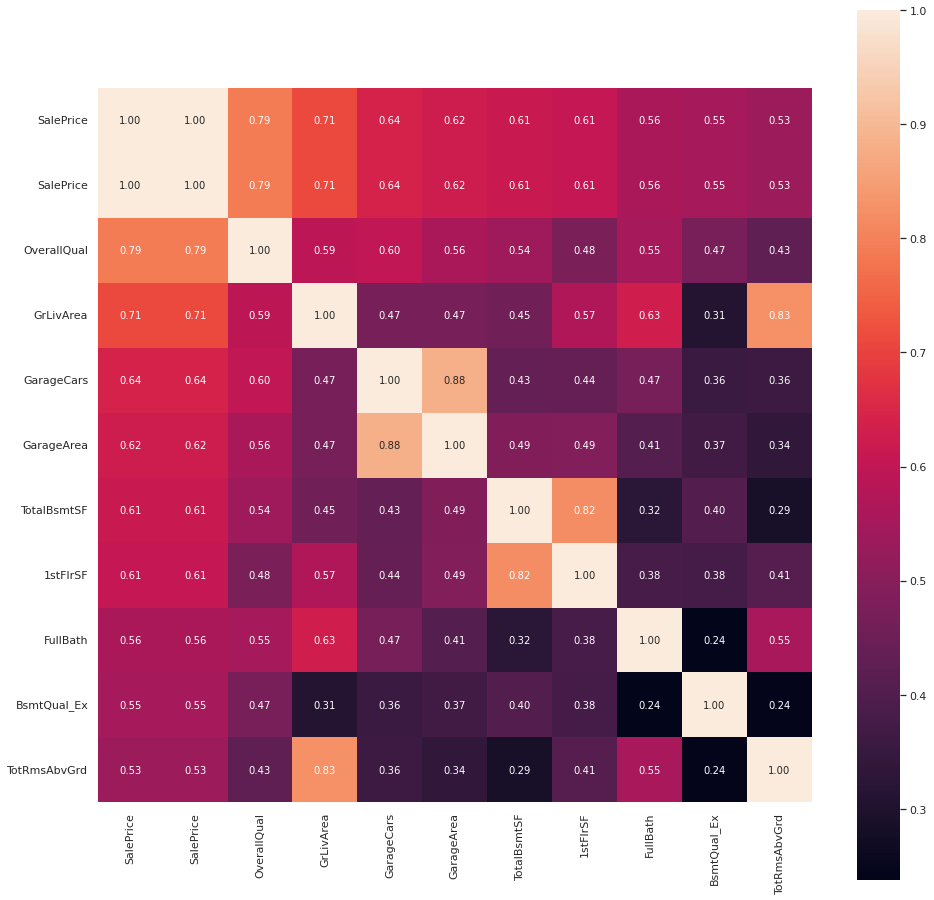

In [58]:
heatMapCols=np.append(cols[-10:], np.array(['SalePrice']))
cm = np.corrcoef(train[heatMapCols[::-1]].T)
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
with sns.axes_style("white"):
    sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)

In [59]:
train_label = train['SalePrice']
cols = np.delete(cols,len(cols)-1)
train_sample = train[cols]
test_sample = test[cols]

In [60]:
test_sample.head()
train_sample.head()

,BsmtUnfSF,Neighborhood_StoneBr,LotShape_IR1,BsmtFullBath,PavedDrive_Y,BsmtQual_Gd,GarageType_BuiltIn,RoofStyle_Hip,Electrical_SBrkr,HouseStyle_2Story,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,150.0,0,0,1.0,1,1,0,0,1,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,284.0,0,0,0.0,1,1,0,0,1,0,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,434.0,0,1,1.0,1,1,0,0,1,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,540.0,0,1,1.0,1,0,0,0,1,1,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,490.0,0,1,1.0,1,1,0,0,1,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

imputer.fit(train_sample)

train_sample = imputer.transform(train_sample)
test_sample = imputer.transform(test_sample)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_sample)

train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)

In [66]:
X_train, X_test , y_train, y_test = train_test_split(train_sample,train_label,train_size = 0.8)

In [67]:
X_train.shape
X_test.shape
test_sample.shape

(1459, 54)

In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_sample,train_label)

LinearRegression()

In [75]:
predictions = model.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Text(0.5, 1.0, 'Linear Regression Model')

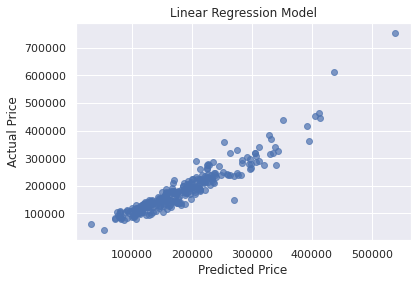

In [79]:
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')